In [1]:
import os
import shutil
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.preprocessing import image as image_prepocessor
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential  
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D 
from keras.regularizers import l2

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
base_model = ResNet50(include_top=False, weights='imagenet')

In [3]:
top_model = Sequential()
top_model.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(1024, activation="relu"))
top_model.add(Dropout(0.8))
top_model.add(Dense(120, activation='softmax'))

top_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [4]:
final_model = Sequential()
final_model.add(base_model)
final_model.add(top_model)


In [5]:
trainable_from = 163

for layer in final_model.layers[0].layers[:trainable_from]:
    layer.trainable = False

for layer in final_model.layers[0].layers[trainable_from:]:
    layer.trainable = True
    

In [6]:
final_model.load_weights("final_modal_weights_FINAL.h5")

In [7]:
img_path = r"E:\DogBreed\train\valid\bernese_mountain_dog\76d9f6a0b04ea4997e7c58abef533377.jpg"
generator = ImageDataGenerator(rotation_range=10, 
                   width_shift_range=0.1, 
                   height_shift_range=0.1, 
                   shear_range=0.15, 
                   zoom_range=0.1, 
                   channel_shift_range=10.0, 
                   horizontal_flip=True, 
                   preprocessing_function=None)

img = image_prepocessor.load_img(img_path, target_size=(224, 224))
x = image_prepocessor.img_to_array(img)
x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
print(x.shape)
aug_iter = generator.flow(x)
aug_img = np.array([next(aug_iter)[0].astype(np.uint8) for _ in range(10)])

(1, 224, 224, 3)


In [8]:
preds = final_model.predict(aug_img)

In [9]:
# for pred in preds:
#     print("max: '{}' at {} at index four: '{}' and at 29: '{}'".format(pred.max(), pred.argmax(), pred[4], pred[29]))

In [10]:
final = preds.mean(axis=0)


In [11]:
final.argmax()

34

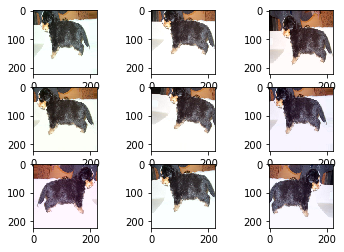

In [12]:
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(aug_img[i])
# show the plot
plt.show()

In [13]:
# img_path = r"E:\DogBreed\train\valid\american_staffordshire_terrier\08149eb72785553570f74a6effea8d7e.jpg"

img = image_prepocessor.load_img(img_path, target_size=(224, 224))
x = image_prepocessor.img_to_array(img)
x = np.expand_dims(x, axis=0)

# x = preprocess_input(x)

preds = final_model.predict(x)


In [14]:
preds.argmax()
    

34

In [15]:
preds

array([[0.01930866, 0.00493376, 0.00297549, 0.00589318, 0.00192194,
        0.0019506 , 0.01679026, 0.0023461 , 0.00334935, 0.00493155,
        0.00304108, 0.00947282, 0.00424551, 0.00422085, 0.00705788,
        0.00541602, 0.00376879, 0.00152048, 0.00314907, 0.00061211,
        0.02347833, 0.00014967, 0.00102545, 0.01757996, 0.00727883,
        0.00043448, 0.00465019, 0.00063621, 0.03288459, 0.00118149,
        0.00552594, 0.00656927, 0.01154993, 0.00133298, 0.06375656,
        0.00306823, 0.00103109, 0.00047034, 0.01558055, 0.00419217,
        0.00357426, 0.0073427 , 0.00493398, 0.00050422, 0.03882527,
        0.00032632, 0.00073319, 0.00810346, 0.01690359, 0.0018742 ,
        0.01794596, 0.00106096, 0.00310393, 0.00581263, 0.00932773,
        0.00425816, 0.02908032, 0.00670882, 0.05720659, 0.01472399,
        0.00646123, 0.00028332, 0.00178829, 0.00481238, 0.00392095,
        0.01982423, 0.00292859, 0.01380872, 0.00526507, 0.00523325,
        0.00452858, 0.00086823, 0.00133285, 0.00